In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
azon=pd.read_csv("C:\\Users\\hp\\OneDrive\\Desktop\\UNIFIED PROJECTS\\Amazon Sales data.csv")

In [3]:
azon.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
azon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [5]:
azon['Order Date'] = pd.to_datetime(azon['Order Date'])
azon['Ship Date'] = pd.to_datetime(azon['Ship Date'])

In [6]:
azon['Region'] = azon['Region'].astype(str)
azon['Country'] = azon['Country'].astype(str)
azon['Item Type'] = azon['Item Type'].astype(str)
azon['Sales Channel'] = azon['Sales Channel'].astype(str)
azon['Order Priority'] = azon['Order Priority'].astype(str)

In [7]:
azon[['Units Sold', 'Unit Price',	'Unit Cost', 'Total Revenue', 'Total Cost',	'Total Profit']].describe()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [8]:
azon['Order Month'] = azon['Order Date'].dt.month
azon['Order Year'] = azon['Order Date'].dt.year
azon['Order Date MonthYear'] = azon['Order Date'].dt.strftime('%Y-%m')
azon = azon.drop(columns=['Order Date'])

In [9]:
pd.set_option('display.max_rows', None)
azon['Country'].value_counts()

The Gambia                          4
Sierra Leone                        3
Sao Tome and Principe               3
Australia                           3
Mexico                              3
Djibouti                            3
Switzerland                         2
Azerbaijan                          2
Myanmar                             2
Rwanda                              2
Mali                                2
Cameroon                            2
Norway                              2
Honduras                            2
Turkmenistan                        2
Libya                               2
Bulgaria                            2
San Marino                          1
Albania                             1
Russia                              1
Democratic Republic of the Congo    1
Laos                                1
Kenya                               1
East Timor                          1
France                              1
United Kingdom                      1
Solomon Isla

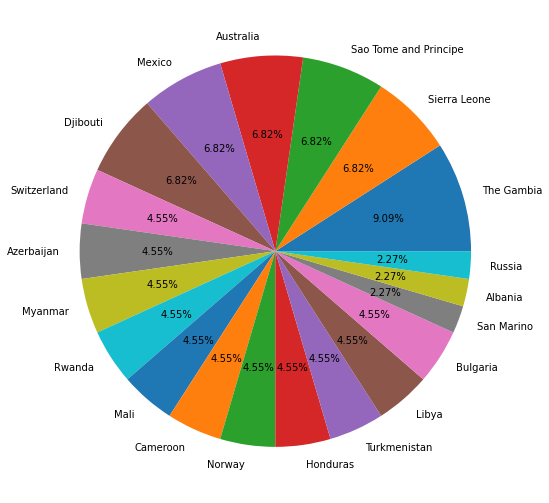

In [10]:
country_names = azon.Country.value_counts().index
country_val = azon.Country.value_counts().values
# Pie Chart for top 20 country
fig,ax = plt.subplots(figsize=(9,9))
ax.pie(country_val[:20],labels=country_names[:20],autopct='%1.2f%%')
plt.show()

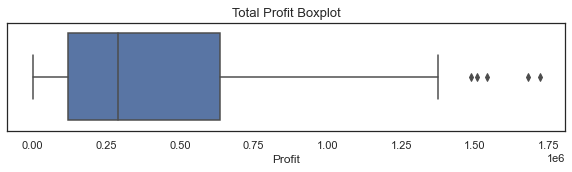

In [12]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(azon['Total Profit'])

plt.title('Total Profit Boxplot', fontsize=13)
plt.xlabel('Profit')
plt.show()

In [19]:
from scipy import stats

In [20]:
z = np.abs(stats.zscore(azon["Total Profit"]))
print(z)

[1.16819191 0.44294759 0.49750969 0.96749426 0.45238953 0.35888172
 0.5780577  0.15706725 0.66362923 0.32633263 0.99430296 0.31073052
 0.37849577 2.39625002 0.73076761 0.73066205 1.7579474  0.81736358
 0.4424624  0.23776058 0.62445615 0.73257647 0.73107141 1.00016411
 0.72106154 0.2890132  0.98242905 0.9800872  0.82834575 0.11207296
 2.43893935 0.89019972 0.16621679 2.12126125 0.08633458 0.64415967
 0.99134352 0.38733487 0.92864117 0.14135034 0.83908495 1.87031705
 0.58242912 0.98750296 0.01416966 0.81692864 2.52102498 0.99656436
 0.30763759 0.64594049 0.63034975 0.95918734 0.18733297 0.01199922
 0.97006256 0.42619065 0.65485953 0.1222119  0.9051345  1.86274605
 0.87377701 0.03128988 0.58432802 0.01713586 0.33284533 0.77172441
 0.51510926 0.08687924 1.38550711 0.22348297 0.43734391 1.00852626
 0.80620195 0.74518328 2.92946077 1.62901616 0.67563607 0.47229445
 0.88017673 2.83462397 0.70187861 0.31470658 1.57345397 0.49602427
 0.07803914 0.64341305 0.69537527 0.20902007 1.00936027 0.8449

In [22]:
threshold_z = 2
 
outlier_indices = np.where(z > threshold_z)[0]
no_outliers = azon.drop(outlier_indices)
print("Original DataFrame Shape:", azon.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

Original DataFrame Shape: (100, 16)
DataFrame Shape after Removing Outliers: (93, 16)


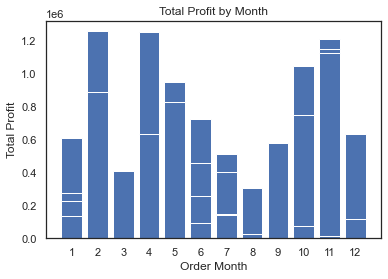

In [38]:
plt.bar(no_outliers['Order Month'], no_outliers['Total Profit'])
plt.title('Total Profit by Month')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Order Month')
plt.ylabel('Total Profit')
plt.show()

Total profit was most in February and April. 

Text(0.5, 1.0, 'Profit per year')

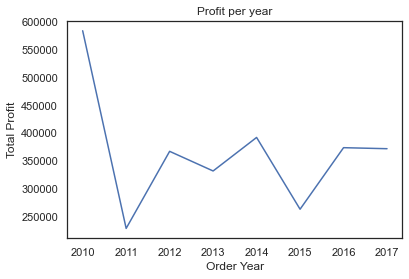

In [24]:
no_outliers.groupby('Order Year')['Total Profit'].mean().plot()
plt.xlabel('Order Year')
plt.ylabel('Total Profit')
plt.title('Profit per year')

2010 had the maximum total profit.

Text(0.5, 1.0, 'Yearly-month wise profit')

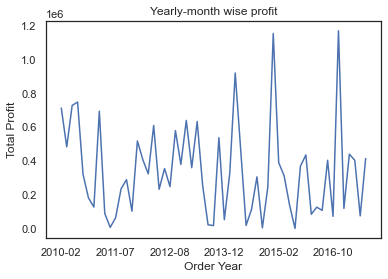

In [27]:
no_outliers.groupby('Order Date MonthYear')['Total Profit'].mean().plot()
plt.xlabel('Order Year')
plt.ylabel('Total Profit')
plt.title('Yearly-month wise profit')

Yearly-month-wise profit peaked in February of 2015 and October of 2016

In [28]:
z1 = np.abs(stats.zscore(azon["Total Cost"]))

In [34]:
outlier_indices1 = np.where(z > threshold_z)[0]
no_outliers1 = azon.drop(outlier_indices)
print("Original DataFrame Shape:", azon.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers1.shape)

Original DataFrame Shape: (100, 16)
DataFrame Shape after Removing Outliers: (93, 16)


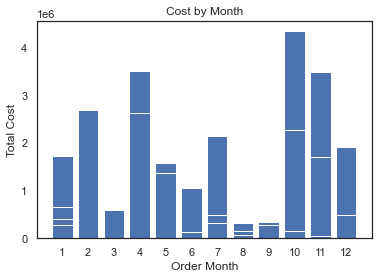

In [37]:
plt.bar(no_outliers1['Order Month'], no_outliers1['Total Cost'])
plt.title('Cost by Month')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Order Month')
plt.ylabel('Total Cost')
plt.show()

Total cost was max in October.

Text(0.5, 1.0, 'Cost per year')

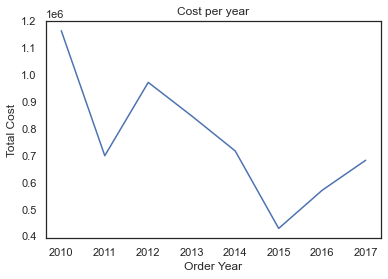

In [32]:
no_outliers1.groupby('Order Year')['Total Cost'].mean().plot()
plt.xlabel('Order Year')
plt.ylabel('Total Cost')
plt.title('Cost per year')

Text(0.5, 1.0, 'Yearly-month wise cost')

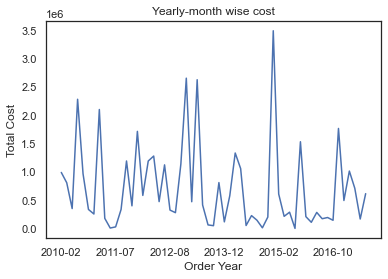

In [33]:
no_outliers1.groupby('Order Date MonthYear')['Total Cost'].mean().plot()
plt.xlabel('Order Year')
plt.ylabel('Total Cost')
plt.title('Yearly-month wise cost')

The cost was max in February of 2015.

In [35]:
z2 = np.abs(stats.zscore(azon["Total Revenue"]))
outlier_indices2 = np.where(z > threshold_z)[0]
no_outliers2 = azon.drop(outlier_indices)
print("Original DataFrame Shape:", azon.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers2.shape)

Original DataFrame Shape: (100, 16)
DataFrame Shape after Removing Outliers: (93, 16)


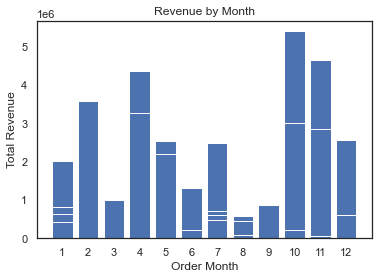

In [41]:
plt.bar(no_outliers2['Order Month'], no_outliers2['Total Revenue'])
plt.title('Revenue by Month')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Order Month')
plt.ylabel('Total Revenue')
plt.show()

Revenue was max in October.

Text(0.5, 1.0, 'Revenue per year')

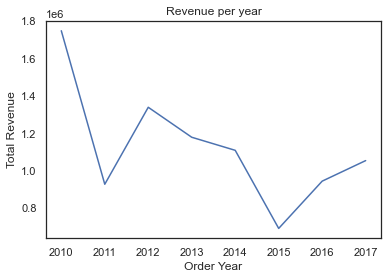

In [39]:
no_outliers2.groupby('Order Year')['Total Revenue'].mean().plot()
plt.xlabel('Order Year')
plt.ylabel('Total Revenue')
plt.title('Revenue per year')

Revenue was max in 2010.

Text(0.5, 1.0, 'Yearly-month wise revenue')

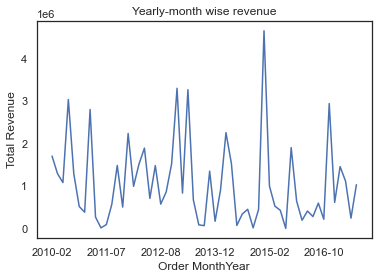

In [40]:
no_outliers2.groupby('Order Date MonthYear')['Total Revenue'].mean().plot()
plt.xlabel('Order MonthYear')
plt.ylabel('Total Revenue')
plt.title('Yearly-month wise revenue')